### First we will load all the necessary packages and modules to be needed and read the dataset.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

In [3]:
pokemon_dataset = pd.read_csv('pokemons dataset.csv', index_col=0)
np.random.seed(0)

In [4]:
pokemon_dataset

,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Name,,,,,,,,,,
Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
...,...,...,...,...,...,...,...,...,...,...
Glastrier,NaN,ICE,NaN,145,130,100,65,110,30,580
Spectrier,NaN,GHOST,NaN,65,60,100,145,80,130,580
Calyrex,NaN,PSYCHIC,GRASS,80,80,100,80,80,80,500


# Data cleaning

#### We will check if the datatypes of all the columns are accurate or not because it may have numeric values in the dataset but they can be set as object or string which we dont want.

In [5]:
pokemon_dataset.dtypes

Name2             object
Primary Type      object
Secondary type    object
Attack             int64
Defense            int64
HP                 int64
Sp.Attack          int64
Sp.Defense         int64
Speed              int64
Total              int64
dtype: object

#### Okay it looks fine so next what we will do is check for null values and get rid of them.

In [6]:
count_missing = pokemon_dataset.isnull().sum()
count_missing

Name2             870
Primary Type        0
Secondary type    492
Attack              0
Defense             0
HP                  0
Sp.Attack           0
Sp.Defense          0
Speed               0
Total               0
dtype: int64

#### here we can see, the column 'Secondary type' has 492 rows of null values so instead of getting rid of the entire column, we will only delete the rows that has the null values and create a new variable to red the cleaned dataset.

In [7]:
new_pokemon_dataset = pokemon_dataset[(pokemon_dataset != 0).all(1)]

In [8]:
new_pokemon_dataset

,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Name,,,,,,,,,,
Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
...,...,...,...,...,...,...,...,...,...,...
Glastrier,NaN,ICE,NaN,145,130,100,65,110,30,580
Spectrier,NaN,GHOST,NaN,65,60,100,145,80,130,580
Calyrex,NaN,PSYCHIC,GRASS,80,80,100,80,80,80,500


#### it may show that we still have null values but they are actually removed now which you will see when we move onto analysis and visualization.

#### We will ignore 'Name 2' here as it is something we shouldn't be focused on

In [9]:
new_pokemon_dataset.dtypes

Name2             object
Primary Type      object
Secondary type    object
Attack             int64
Defense            int64
HP                 int64
Sp.Attack          int64
Sp.Defense         int64
Speed              int64
Total              int64
dtype: object

# Analysis and visualization

## 1st task : Find out the best primary and attack type pokemon.

#### for this, we will separate the stats of primary and secondary type pokemons into two different dataset/dataframe and visualize them.

In [10]:
primary_type = pd.DataFrame(new_pokemon_dataset.groupby(['Primary Type']).sum())
primary_type

,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Primary Type,,,,,,,
BUG,5757,5816,4619,4567,5271,5124,31154
DARK,3769,3054,3223,3270,3145,3528,19989
DRAGON,4388,3441,3495,3761,3448,3458,21991
ELECTRIC,4649,4107,3859,5552,4443,5379,27989
FAIRY,1498,1552,1605,1737,1962,1310,9664
FIGHTING,4323,3094,3063,2408,2865,2996,18749
FIRE,5551,4427,4513,5617,4634,4834,29576
FLYING,601,515,557,591,560,696,3520
GHOST,3107,3358,2722,3506,3310,2648,18651


In [11]:
secondary_type = pd.DataFrame(new_pokemon_dataset.groupby(['Secondary type']).sum())
secondary_type

,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Secondary type,,,,,,,
BUG,650,589,516,540,649,449,3393
DARK,2961,1939,2079,2177,1884,2065,13105
DRAGON,3004,2985,2970,3290,2701,2475,17425
ELECTRIC,883,940,838,817,731,608,4817
FAIRY,2833,3093,2639,3348,3444,2750,18107
FIGHTING,3595,2666,2564,2568,2517,2762,16672
FIRE,1383,1327,1266,1677,1317,1365,8335
FLYING,9059,7719,8058,8635,8038,9537,51046
GHOST,2328,2123,1723,2145,2091,1811,12221


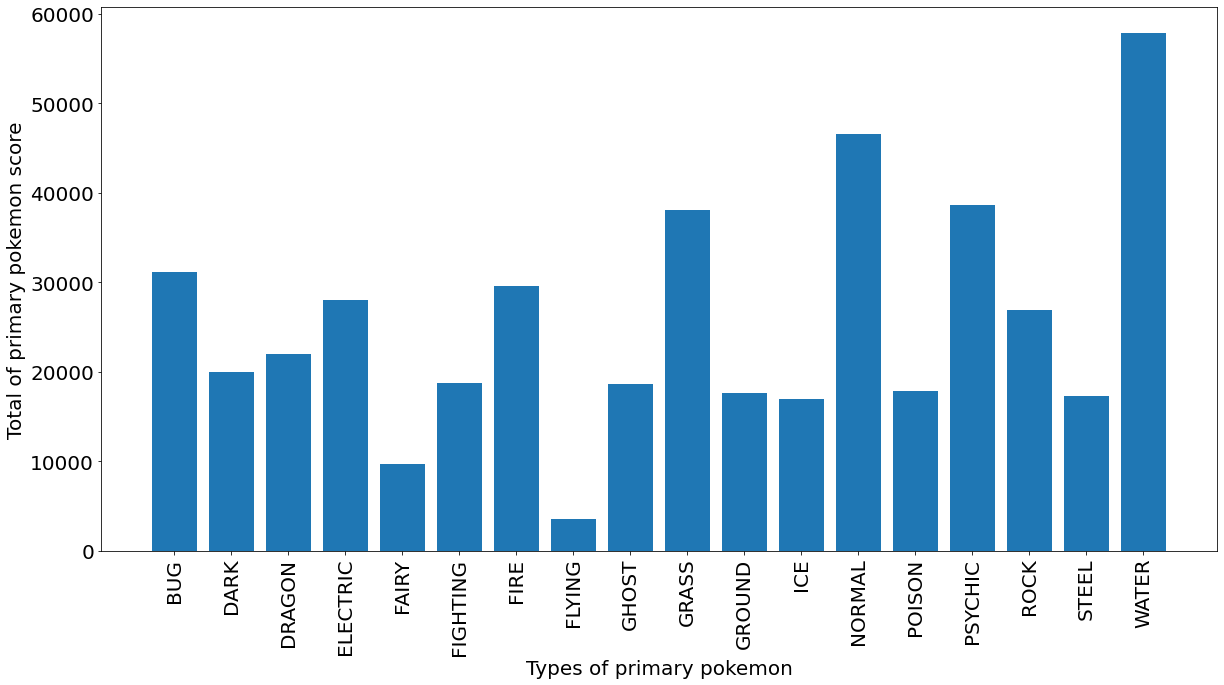

In [37]:
plt.figure(figsize=(20,10))
x = [primary_type for primary_type, df in new_pokemon_dataset.groupby(['Primary Type'])]
plt.bar(x, new_pokemon_dataset.groupby(['Primary Type']).sum()['Total'])
plt.xticks(x, rotation='vertical', size=20)
plt.yticks(size=20)
plt.xlabel('Types of primary pokemon', size=20)
plt.ylabel('Total of primary pokemon score', size=20)
plt.show()

#### Here we can see the best primary type pokemon is the "Water type" and the worst one is the "Flying type". (I dont think charizard is bad is it?)

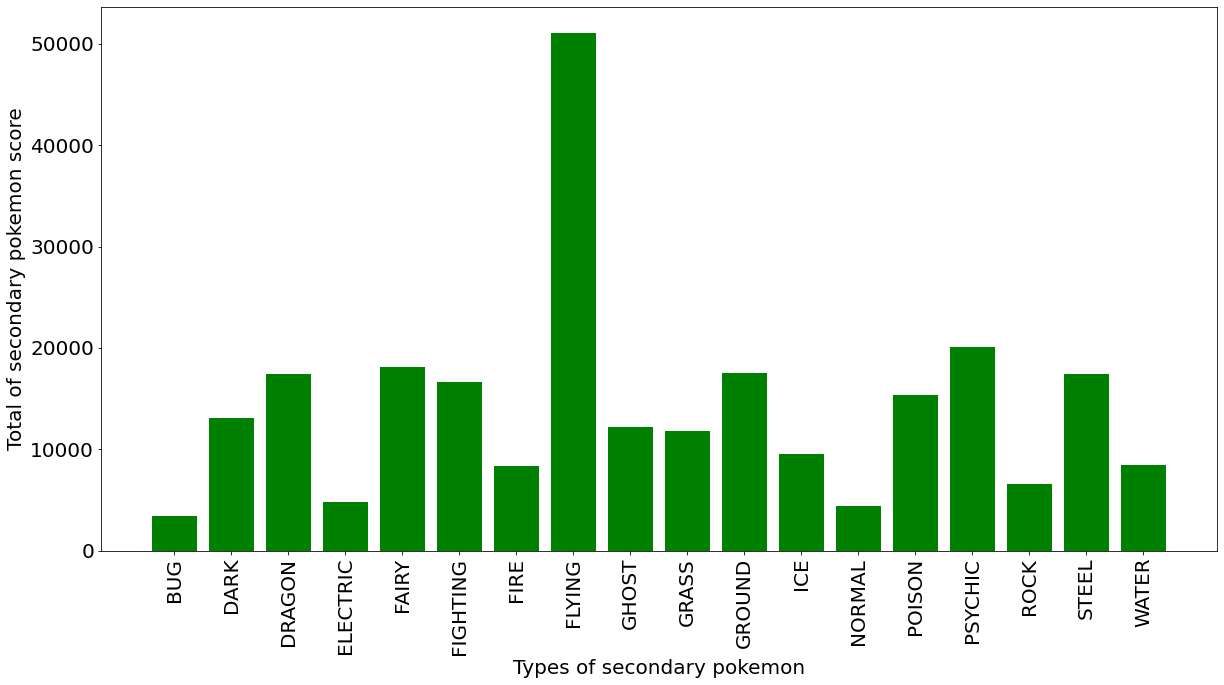

In [13]:
plt.figure(figsize=(20,10))
x1 = [secondary_type for secondary_type, df in new_pokemon_dataset.groupby(['Secondary type'])]
plt.bar(x1, new_pokemon_dataset.groupby(['Secondary type']).sum()['Total'], color='g')
plt.xticks(x1, rotation='vertical', size=20)
plt.yticks(size=20)
plt.xlabel('Types of secondary pokemon', size=20)
plt.ylabel('Total of secondary pokemon score', size=20)
plt.show()

#### here we can see that the best secondary type pokemon is "Flying" (justice to charizard), and the worst one to get is "Bug" (wait scizor is bad?) 

## 2nd task: Which is the best overall pokemon? 

#### For this, we will have to merge the stats of both primary and secondary pokemon dataframe that we created and based on the total, we will get the best pokemon.

In [14]:
prim_secon = pd.concat([primary_type, secondary_type], axis=1)

In [15]:
prim_secon

,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
BUG,5757,5816,4619,4567,5271,5124,31154,650,589,516,540,649,449,3393
DARK,3769,3054,3223,3270,3145,3528,19989,2961,1939,2079,2177,1884,2065,13105
DRAGON,4388,3441,3495,3761,3448,3458,21991,3004,2985,2970,3290,2701,2475,17425
ELECTRIC,4649,4107,3859,5552,4443,5379,27989,883,940,838,817,731,608,4817
FAIRY,1498,1552,1605,1737,1962,1310,9664,2833,3093,2639,3348,3444,2750,18107
FIGHTING,4323,3094,3063,2408,2865,2996,18749,3595,2666,2564,2568,2517,2762,16672
FIRE,5551,4427,4513,5617,4634,4834,29576,1383,1327,1266,1677,1317,1365,8335
FLYING,601,515,557,591,560,696,3520,9059,7719,8058,8635,8038,9537,51046
GHOST,3107,3358,2722,3506,3310,2648,18651,2328,2123,1723,2145,2091,1811,12221
GRASS,6808,6536,6073,6829,6375,5439,38060,2185,2288,1841,1740,2128,1658,11840


#### This was optional.

<AxesSubplot:>

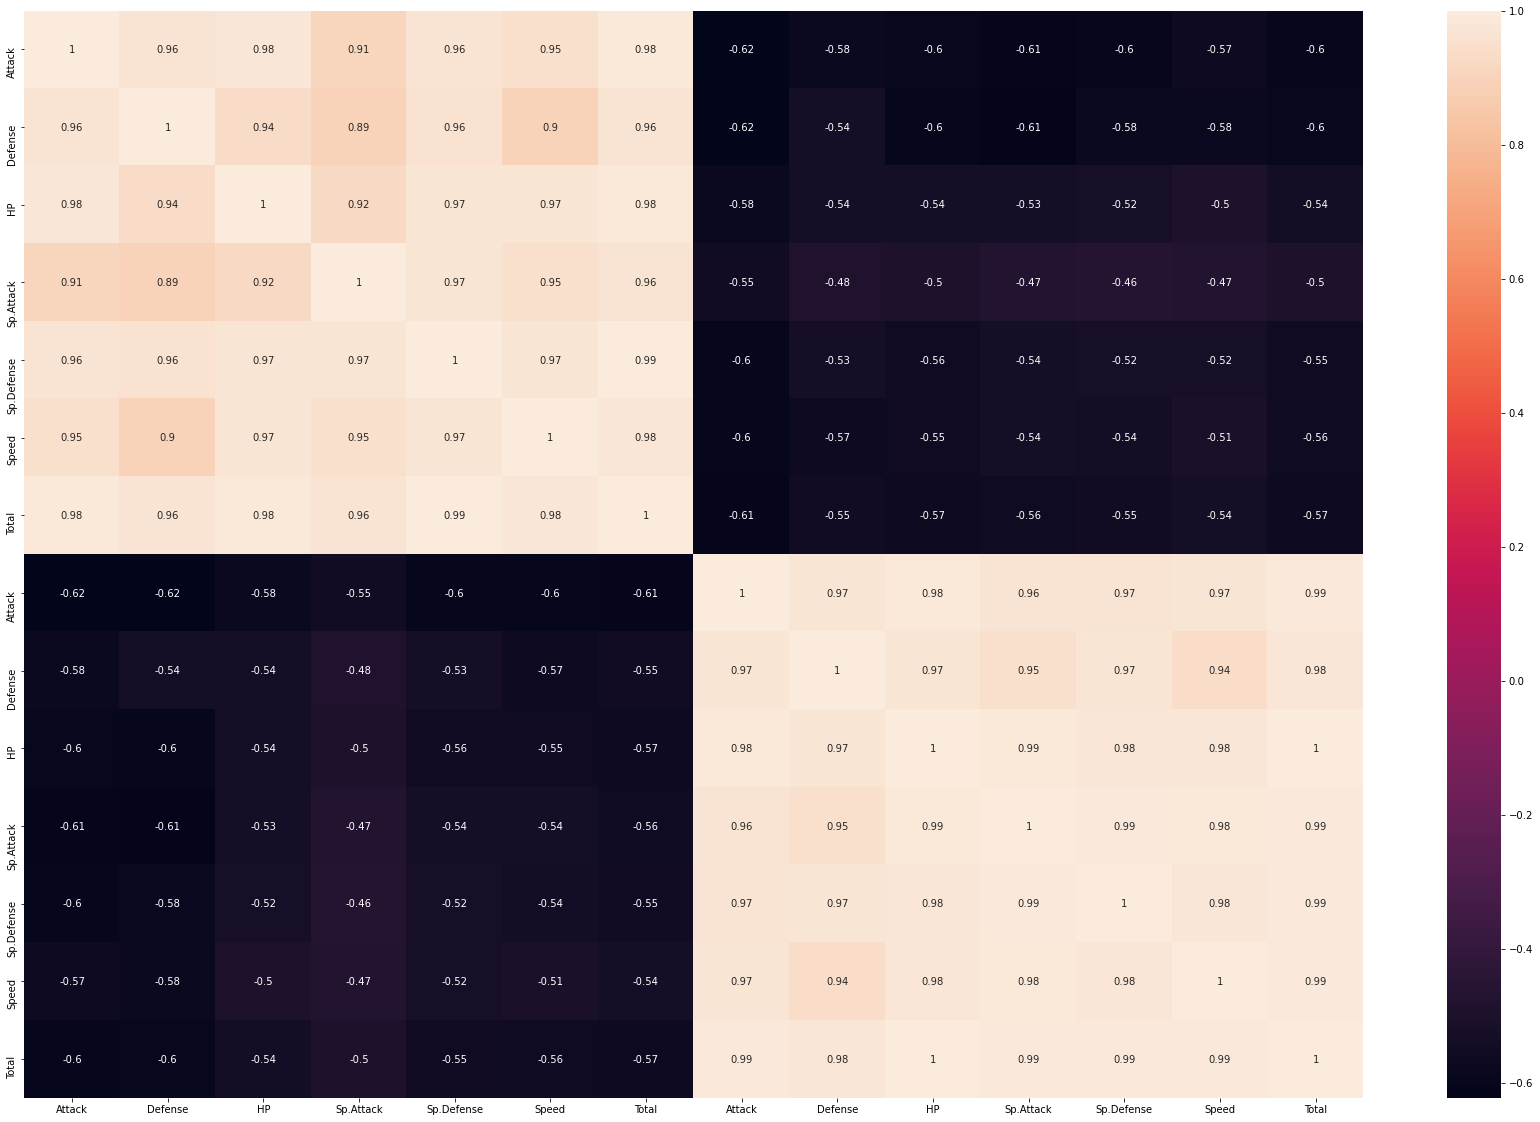

In [16]:
plt.figure(figsize=(30,20))
prim_secon_corr = prim_secon.corr()
sns.heatmap(prim_secon_corr, annot=True)

In [17]:
prim_secon_total = pd.DataFrame(primary_type['Total'] + secondary_type['Total'])

In [18]:
prim_secon_total

,Total
Primary Type,
BUG,34547
DARK,33094
DRAGON,39416
ELECTRIC,32806
FAIRY,27771
FIGHTING,35421
FIRE,37911
FLYING,54566
GHOST,30872


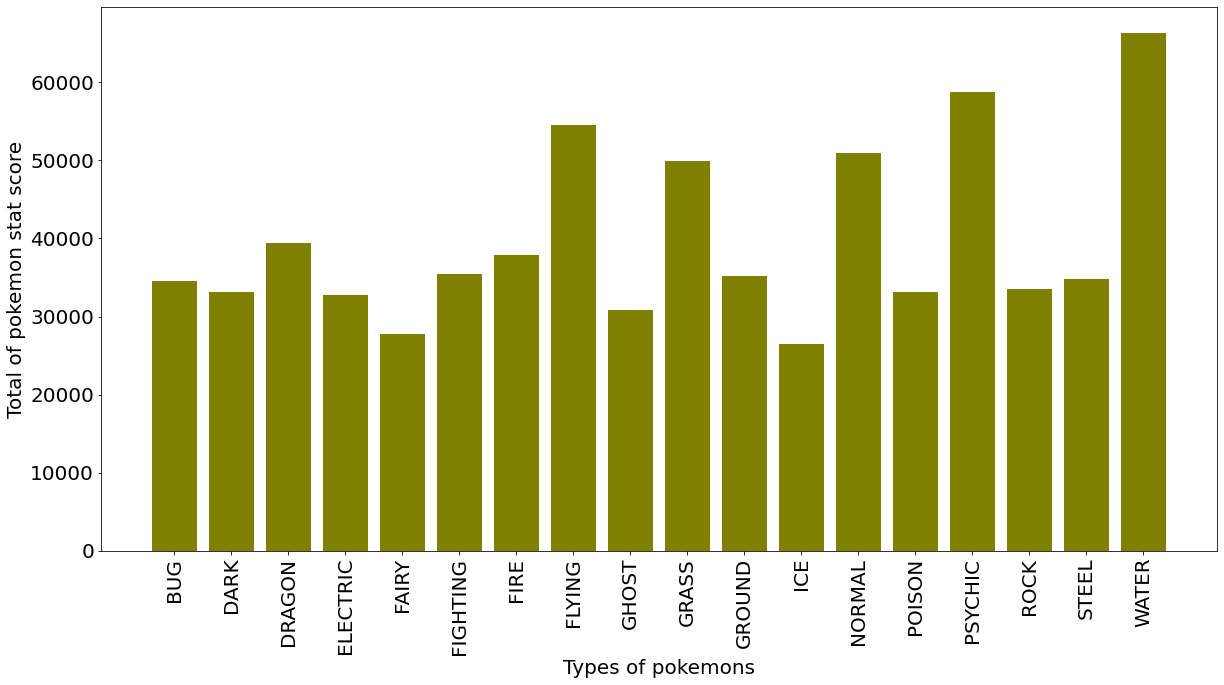

In [19]:
plt.figure(figsize=(20,10))
x2 = [prim_secon_total for prim_secon_total, df in prim_secon_total.groupby(['Primary Type'])]
plt.bar(x2, prim_secon_total.groupby(['Primary Type']).sum()['Total'], color='olive')
plt.xticks(x2, rotation='vertical', size=20)
plt.yticks(size=20)
plt.xlabel('Types of pokemons', size=20)
plt.ylabel('Total of pokemon stat score', size=20)
plt.show()

#### So now we can see that, the best pokemon we can get is "Water type", followed by "Psychic" and then "Flying" whereas, the worst one we can get is "Ice" type (Can't remember any).

## 3rd task: Which is the best, primary type pokemon or secondary type pokemon?

#### for this , we will have to sum up both 'primary_type' and 'secondary_type' dataframes and plot them to see which ones better.

In [20]:
primary_type.sum()

Attack         84088
Defense        78021
HP             73221
Sp.Attack      76308
Sp.Defense     75542
Speed          71904
Total         459084
dtype: int64

In [21]:
secondary_type.sum()

Attack         46871
Defense        44626
HP             40023
Sp.Attack      43178
Sp.Defense     42297
Speed          39434
Total         256429
dtype: int64

#### So from this we can see "primary type" is better than the "secondary type", we dont have to plot it as there is a great difference.

## 4th task: why a certain type is better than the other?

#### For this, we will have to create a barchart based on the total and, based on the spike of attack, defense, hp and speed, we will get an idea that why a certain type is better than the other.

In [22]:
primary_type

,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Primary Type,,,,,,,
BUG,5757,5816,4619,4567,5271,5124,31154
DARK,3769,3054,3223,3270,3145,3528,19989
DRAGON,4388,3441,3495,3761,3448,3458,21991
ELECTRIC,4649,4107,3859,5552,4443,5379,27989
FAIRY,1498,1552,1605,1737,1962,1310,9664
FIGHTING,4323,3094,3063,2408,2865,2996,18749
FIRE,5551,4427,4513,5617,4634,4834,29576
FLYING,601,515,557,591,560,696,3520
GHOST,3107,3358,2722,3506,3310,2648,18651


In [23]:
secondary_type

,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Secondary type,,,,,,,
BUG,650,589,516,540,649,449,3393
DARK,2961,1939,2079,2177,1884,2065,13105
DRAGON,3004,2985,2970,3290,2701,2475,17425
ELECTRIC,883,940,838,817,731,608,4817
FAIRY,2833,3093,2639,3348,3444,2750,18107
FIGHTING,3595,2666,2564,2568,2517,2762,16672
FIRE,1383,1327,1266,1677,1317,1365,8335
FLYING,9059,7719,8058,8635,8038,9537,51046
GHOST,2328,2123,1723,2145,2091,1811,12221


### Combinations

### 1. Attack & speed

### 2. defense & hp

**You can make your own combinations. This is my own preference so let's see how they turn out**

In [26]:
combination_1['Atk_spd'] = pd.DataFrame(primary_type['Attack'] + primary_type['Speed'])
combination_1

,0,Atk_spd
Primary Type,,
BUG,10881,10881
DARK,7297,7297
DRAGON,7846,7846
ELECTRIC,10028,10028
FAIRY,2808,2808
FIGHTING,7319,7319
FIRE,10385,10385
FLYING,1297,1297
GHOST,5755,5755


In [28]:
combination_2['Def_hp'] = pd.DataFrame(primary_type['Defense'] + primary_type['HP'])
combination_2

,0,Def_hp
Primary Type,,
BUG,10435,10435
DARK,6277,6277
DRAGON,6936,6936
ELECTRIC,7966,7966
FAIRY,3157,3157
FIGHTING,6157,6157
FIRE,8940,8940
FLYING,1072,1072
GHOST,6080,6080


<ipython-input-29-237d033fe348>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-29-237d033fe348>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


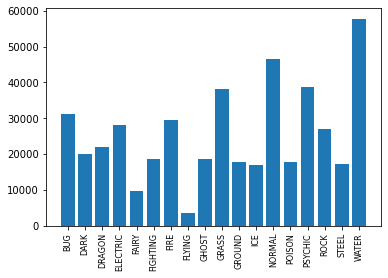

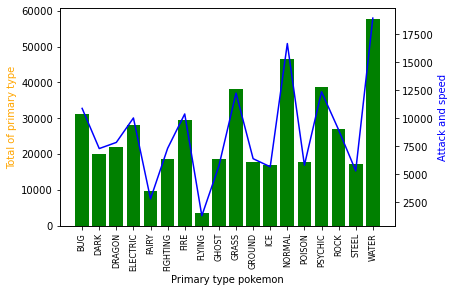

In [29]:
prim_type = primary_type.groupby('Primary Type')
prim_total = primary_type['Total']

keys = [pair for pair, df in prim_type]
plt.bar(keys, prim_total)
plt.xticks(keys, rotation='vertical', size=8)

total_stat = combination_1.groupby('Primary Type').mean()['Atk_spd']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys, prim_total, color='g')
ax2.plot(keys, total_stat, color='b')
ax1.set_xlabel('Primary type pokemon')
ax1.set_ylabel('Total of primary type', color='orange')
ax2.set_ylabel('Attack and speed', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)
fig.show()

### we can observe a number of things here:
#### 1. Water type is the only one relying on attack and speed.
#### 2. grass and pyschic are having more power than having their attack which means they have other attribute that is making them                more stronger
#### 3. Dark,dragon, electric and fighting despite being in the spike region have low power which means their main power is relied on              some other attribute than attack and speed


### We will do the same for the next combination which is 'combination_2'

<ipython-input-30-96f3b6fe65bd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-30-96f3b6fe65bd>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


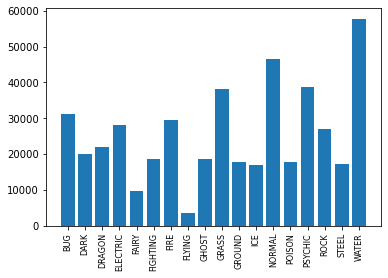

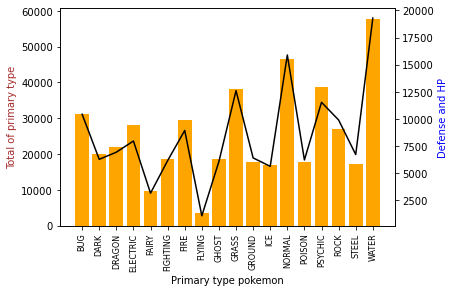

In [30]:
prim_type_2 = primary_type.groupby('Primary Type')
prim_total_2 = primary_type['Total']

keys_2 = [pair for pair, df in prim_type_2]
plt.bar(keys_2, prim_total_2)
plt.xticks(keys_2, rotation='vertical', size=8)

total_stat_2 = combination_2.groupby('Primary Type').mean()['Def_hp']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys_2, prim_total_2, color='orange')
ax2.plot(keys_2, total_stat_2, color='black')
ax1.set_xlabel('Primary type pokemon')
ax1.set_ylabel('Total of primary type', color='brown')
ax2.set_ylabel('Defense and HP', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)
fig.show()

In [33]:
combination_1_1['atl_spd'] = pd.DataFrame(secondary_type['Attack'] + secondary_type['Speed'])
combination_1_1

,0,atl_spd
Secondary type,,
BUG,1099,1099
DARK,5026,5026
DRAGON,5479,5479
ELECTRIC,1491,1491
FAIRY,5583,5583
FIGHTING,6357,6357
FIRE,2748,2748
FLYING,18596,18596
GHOST,4139,4139


In [35]:
combination_1_2['def_hp'] = pd.DataFrame(secondary_type['Defense'] + secondary_type['HP'])
combination_1_2

#Ignore the column '0'

,0,def_hp
Secondary type,,
BUG,1105,1105
DARK,4018,4018
DRAGON,5955,5955
ELECTRIC,1778,1778
FAIRY,5732,5732
FIGHTING,5230,5230
FIRE,2593,2593
FLYING,15777,15777
GHOST,3846,3846


<ipython-input-36-43a4d1cfebd7>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys_3, rotation='vertical', size=8)
<ipython-input-36-43a4d1cfebd7>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


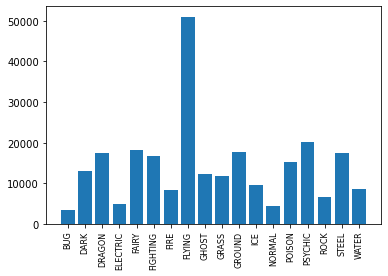

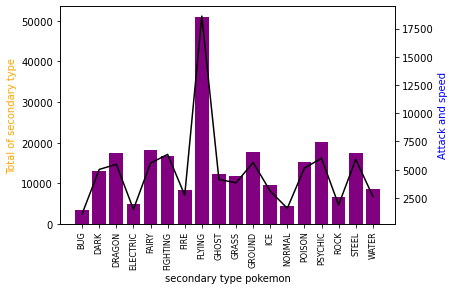

In [36]:
sec_type = secondary_type.groupby('Secondary type')
sec_total = secondary_type['Total']

keys_3 = [pair for pair, df in sec_type]
plt.bar(keys_3, sec_total)
plt.xticks(keys_3, rotation='vertical', size=8)

total_stat_3 = combination_1_1.groupby('Secondary type').mean()['atl_spd']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys_3, sec_total, color='purple')
ax2.plot(keys_3, total_stat_3, color='black')
ax1.set_xlabel('secondary type pokemon')
ax1.set_ylabel('Total of secondary type', color='orange')
ax2.set_ylabel('Attack and speed', color='b')
ax1.set_xticklabels(keys_3, rotation='vertical', size=8)
fig.show()

<ipython-input-38-658d1ab8f553>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys_4, rotation='vertical', size=8)
<ipython-input-38-658d1ab8f553>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


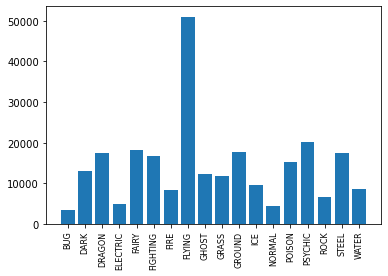

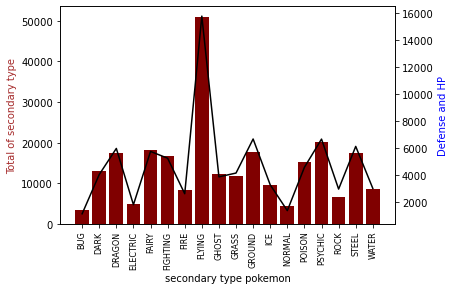

In [38]:
sec_type_2 = secondary_type.groupby('Secondary type')
sec_total_2 = secondary_type['Total']

keys_4 = [pair for pair, df in sec_type_2]
plt.bar(keys_4, sec_total_2)
plt.xticks(keys_4, rotation='vertical', size=8)

total_stat_4 = combination_1_2.groupby('Secondary type').mean()['def_hp']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys_4, sec_total_2, color='maroon')
ax2.plot(keys_4, total_stat_4, color='black')
ax1.set_xlabel('secondary type pokemon')
ax1.set_ylabel('Total of secondary type', color='brown')
ax2.set_ylabel('Defense and HP', color='b')
ax1.set_xticklabels(keys_4, rotation='vertical', size=8)
fig.show()

#### So from here as well we can make a number of interpretation:
### Graph 1:
#### 1. Fighting and flying's total power is depended upon their attack and speed level.
#### 2. Dark is the only one that is below its spike level that means its power is not depended upon its attack and speed.
#### 3. Dragon, fairy, ground, poison, psychic and steel are all way above their spike range of attack which means apart from attack                  and speed, their power is also depended upon something else, perhaps, defense or hp.

### Graph 2:
#### 1. Faiy, fighting and flying are in the same power level as their attack which means their main power up is based on their defense              and HP.
#### 2. Dragon, ground and steel are all below their power level of defense and HP which means Defense and HP are not their                        strongest form of power.


### ............................................................................................

### ................................................................................................................................

### ................................................................................................................................................................

### Now, at the end we will create a new column where we will put a conditional statement that whether we should get this type of particular pokemon type or not and then export the file into a csv.

#### First we will get rid of the rows in the dataset having NaN values by converting them to '0' and the deleting the rows with the values 0.

In [39]:
new_pokemon_dataset

,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Name,,,,,,,,,,
Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
...,...,...,...,...,...,...,...,...,...,...
Glastrier,NaN,ICE,NaN,145,130,100,65,110,30,580
Spectrier,NaN,GHOST,NaN,65,60,100,145,80,130,580
Calyrex,NaN,PSYCHIC,GRASS,80,80,100,80,80,80,500


In [40]:
new_pokemon_dataset['Secondary type'] = new_pokemon_dataset['Secondary type'].fillna(0)

In [41]:
new_pokemon_dataset

,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Name,,,,,,,,,,
Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
Charmander,NaN,FIRE,0,52,43,39,60,50,65,309
...,...,...,...,...,...,...,...,...,...,...
Glastrier,NaN,ICE,0,145,130,100,65,110,30,580
Spectrier,NaN,GHOST,0,65,60,100,145,80,130,580
Calyrex,NaN,PSYCHIC,GRASS,80,80,100,80,80,80,500


In [42]:
drop_zero = (new_pokemon_dataset != 0).all(axis=1)

In [43]:
clean_dataset = new_pokemon_dataset.loc[drop_zero]
print(clean_dataset)

                        Name2 Primary Type Secondary type  Attack  Defense  \
Name                                                                         
Bulbasaur                 NaN        GRASS         POISON      49       49   
Ivysaur                   NaN        GRASS         POISON      62       63   
Venusaur                  NaN        GRASS         POISON      82       83   
Venusaur        Mega Venusaur        GRASS         POISON     100      123   
Charizard                 NaN         FIRE         FLYING      84       78   
...                       ...          ...            ...     ...      ...   
Urshifu    Rapid Strike Style     FIGHTING          WATER     130      100   
Zarude                    NaN         DARK          GRASS     120      105   
Calyrex                   NaN      PSYCHIC          GRASS      80       80   
Calyrex             Ice Rider      PSYCHIC            ICE     165      150   
Calyrex          Shadow Rider      PSYCHIC          GHOST      8

In [44]:
pd.DataFrame(clean_dataset)

,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Name,,,,,,,,,,
Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
Charizard,NaN,FIRE,FLYING,84,78,78,109,85,100,534
...,...,...,...,...,...,...,...,...,...,...
Urshifu,Rapid Strike Style,FIGHTING,WATER,130,100,100,63,60,97,550
Zarude,NaN,DARK,GRASS,120,105,105,70,95,105,600
Calyrex,NaN,PSYCHIC,GRASS,80,80,100,80,80,80,500


#### Now, we will add a new column 'Have_this' with the statement 'Yes' or 'No' whether to get this type of pokemon or not.

#### we will do that by taking into the analysis from the primary and secondary type dataframe that we created earlier.

In [45]:
primary_choice = pd.DataFrame(combination_1['Atk_spd'] - combination_2['Def_hp'])
primary_type_choice = pd.DataFrame(primary_choice)
primary_type_choice['Marginal Stat'] = primary_type_choice

In [46]:
primary_type_choice

,0,Marginal Stat
Primary Type,,
BUG,446,446
DARK,1020,1020
DRAGON,910,910
ELECTRIC,2062,2062
FAIRY,-349,-349
FIGHTING,1162,1162
FIRE,1445,1445
FLYING,225,225
GHOST,-325,-325


In [47]:
secondary_choice = pd.DataFrame(combination_1_1['atl_spd'] - combination_1_2['def_hp'])
secondary_type_choice = pd.DataFrame(secondary_choice)
secondary_type_choice['marginal stat'] = secondary_type_choice

In [48]:
secondary_type_choice

,0,marginal stat
Secondary type,,
BUG,-6,-6
DARK,1008,1008
DRAGON,-476,-476
ELECTRIC,-287,-287
FAIRY,-149,-149
FIGHTING,1127,1127
FIRE,155,155
FLYING,2819,2819
GHOST,293,293


### Now lets add a column on the existing dataset to signify whether we want to have this pokemon or not.

In [52]:
have_this = primary_type_choice['Marginal Stat'] + secondary_type_choice['marginal stat']
have_this

Primary Type
BUG          440
DARK        2028
DRAGON       434
ELECTRIC    1775
FAIRY       -498
FIGHTING    2289
FIRE        1600
FLYING      3044
GHOST        -32
GRASS       -648
GROUND     -1034
ICE         -108
NORMAL      1020
POISON       184
PSYCHIC      202
ROCK       -1997
STEEL      -1601
WATER       -692
dtype: int64

In [56]:
choice_set_pokemon = pd.DataFrame(data=have_this)

In [57]:
choice_set_pokemon

,0
Primary Type,
BUG,440
DARK,2028
DRAGON,434
ELECTRIC,1775
FAIRY,-498
FIGHTING,2289
FIRE,1600
FLYING,3044
GHOST,-32


### So this is the dataframe we need to export as a csv or xlsx file but first we need to add a column to get which kind of pokemon we need and rename that column '0'

In [69]:
final_pokemon = pd.DataFrame(choice_set_pokemon.rename(columns={0 : 'Scores'}, inplace=False))

In [70]:
final_pokemon

,Scores
Primary Type,
BUG,440
DARK,2028
DRAGON,434
ELECTRIC,1775
FAIRY,-498
FIGHTING,2289
FIRE,1600
FLYING,3044
GHOST,-32


In [71]:
final_pokemon['Should I get this'] = np.where(final_pokemon['Scores'] > 0, True, False)

In [72]:
final_pokemon

,Scores,Should I get this
Primary Type,,
BUG,440,True
DARK,2028,True
DRAGON,434,True
ELECTRIC,1775,True
FAIRY,-498,False
FIGHTING,2289,True
FIRE,1600,True
FLYING,3044,True
GHOST,-32,False


### and there we go, so this shows which ones we should get and which ones we should not
### I'm not sure if this is suffice but hope it does the trick for you all
### Now lets export it

In [73]:
final_pokemon.to_csv('pokemon_data.csv')

# .....................................................................................
# ...........................................................................................................................................
# ...........................................................................................................................................